<a href="https://colab.research.google.com/github/ssamadjon3106/PyTorch-with-Deep-Learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

### Linear Regression  

In [43]:
wieght=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=X*wieght+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
len(X), len(y)

(50, 50)

In [45]:
#create traning/test sets
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [46]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7))

    # Plot training data in green
    plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

    # Plot test data in blue
    plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

    # Plot predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


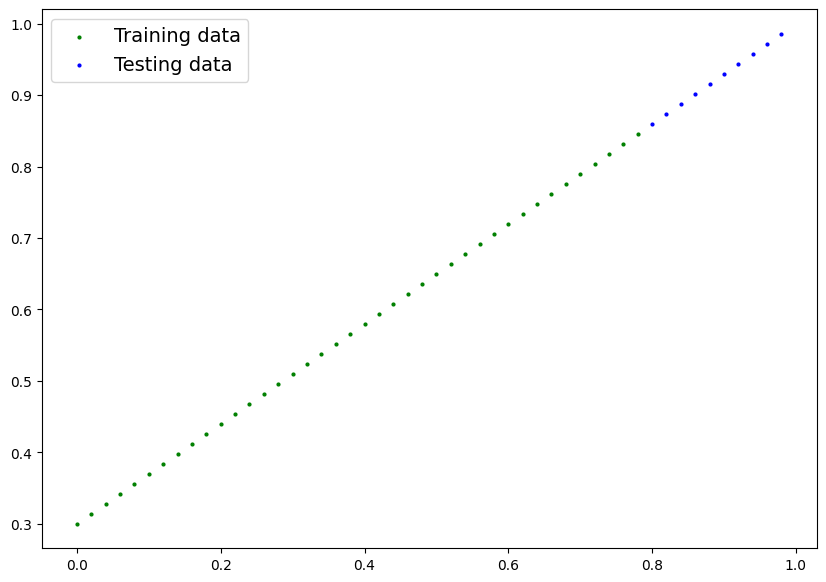

In [47]:
plot_predictions();

In [13]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.wieght = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.wieght * x + self.bias # this is the linear regression formula

In [49]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
print(list(model_0.parameters()))


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [50]:
model_0.state_dict()

OrderedDict([('wieght', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [51]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [52]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

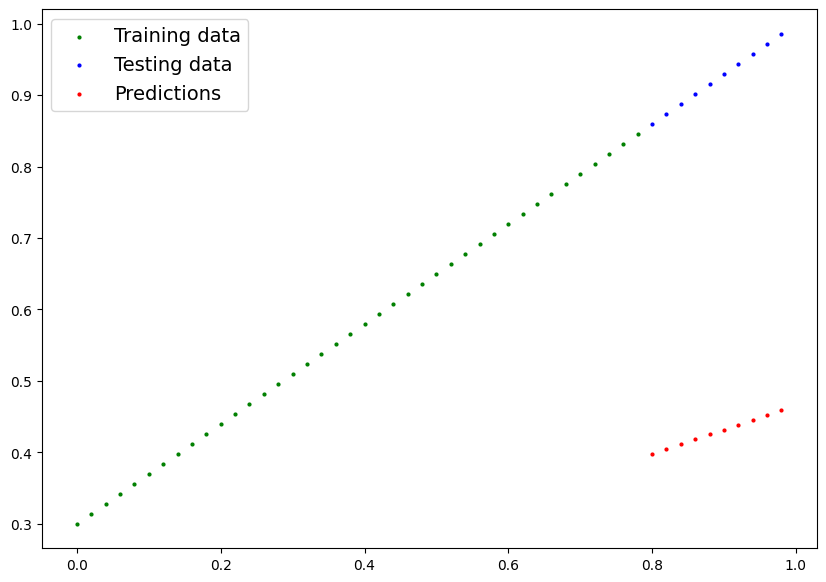

In [53]:
plot_predictions(predictions=y_preds)

In [54]:
model_0.state_dict()

OrderedDict([('wieght', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [55]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [56]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_0.train()

  y_pred=model_0(X_train)
  loss=loss_fn(y_pred, y_train)
  print('LOSS: ', loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    y_preds=model_0(X_test)
    test_loss=loss_fn(y_preds, y_test)
    if epoch % 10==0:
      print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
      print(model_0.state_dict())

LOSS:  tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'wieght': tensor([0.3406]), 'bias': tensor([0.1388])})
LOSS:  tensor(0.3014, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2898, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2783, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2668, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2553, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2438, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2322, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2207, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.2092, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.1977, grad_fn=<MeanBackward0>)
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'wieght': tensor([0.3796]), 'bias': tensor([0.2388])})
LOSS:  tensor(0.1862, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.1746, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.1631, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.1516, grad_fn=<MeanBackward0>)
LOSS:  tensor(0.1401

In [57]:
model_0.state_dict()

OrderedDict([('wieght', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [58]:
model_0.state_dict()

OrderedDict([('wieght', tensor([0.5784])), ('bias', tensor([0.3513]))])

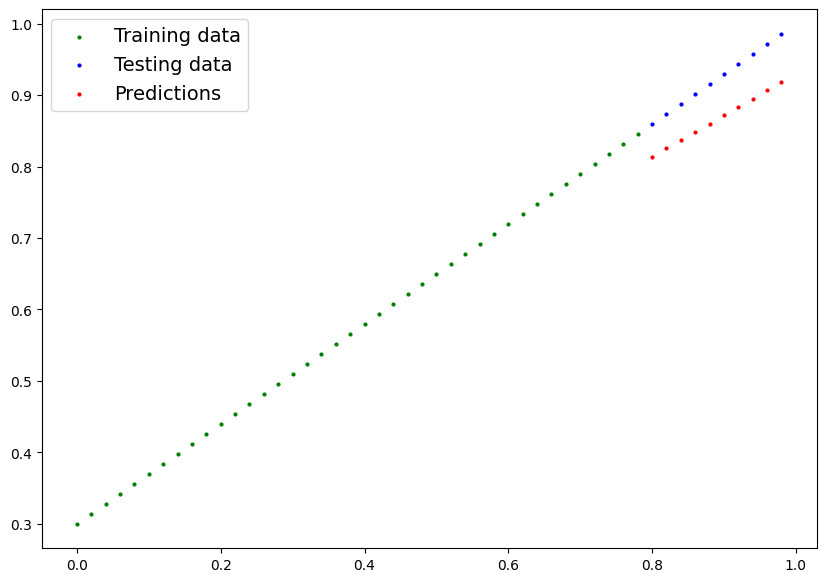

In [59]:
plot_predictions(predictions=y_preds)

In [60]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)


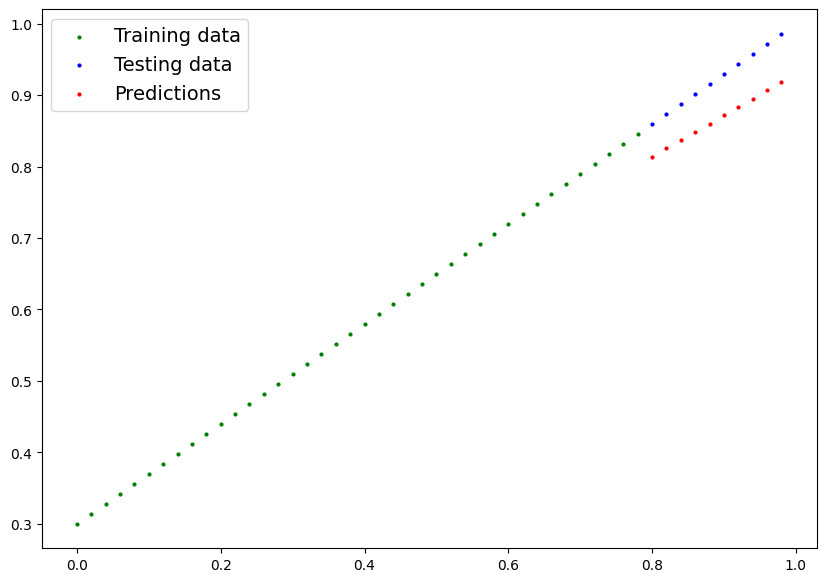

In [61]:
plot_predictions(predictions=y_preds_new)

In [62]:

with torch.inference_mode():
  y_preds_newer=model_0(X_test)


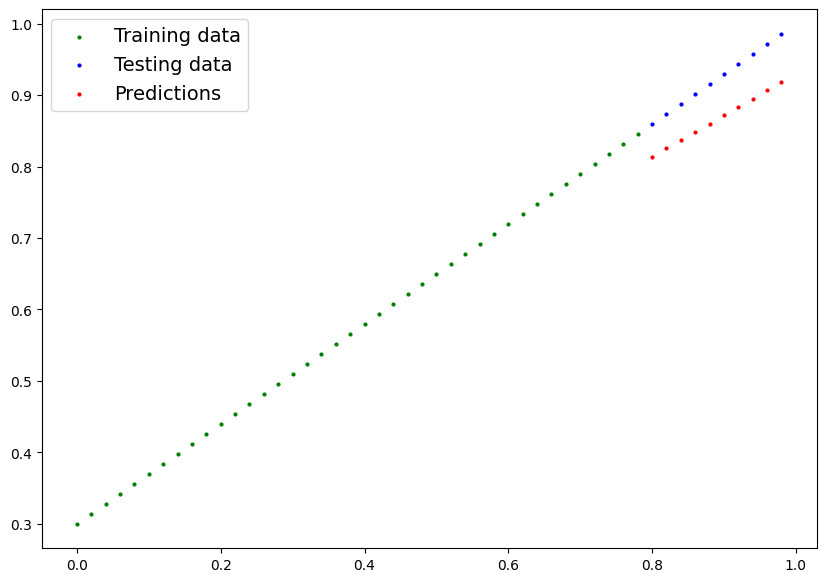

In [63]:
plot_predictions(predictions=y_preds_newer)

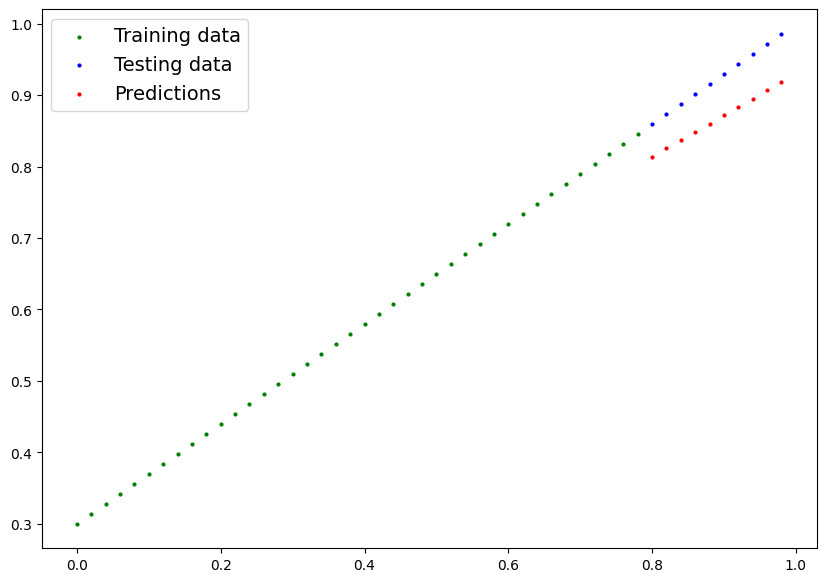

In [64]:
plot_predictions(predictions=y_preds)

In [65]:
model_0.state_dict()

OrderedDict([('wieght', tensor([0.5784])), ('bias', tensor([0.3513]))])

### Saving a model in PyTorch

In [66]:
from pathlib import Path
MODEL_PATH=Path('models')
# Create model directory
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save model state dic
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)



Saving model to models/01_pytorch_workflow_model_0.pth


In [67]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [68]:
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [69]:
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [70]:
y_preds==loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

In [72]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [73]:
weight=0.3
bias=0.1
start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=X*weight+bias
X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1060],
         [0.1120],
         [0.1180],
         [0.1240],
         [0.1300],
         [0.1360],
         [0.1420],
         [0.1480],
         [0.1540]]))

In [74]:
train_split=int(len(X)*0.85)
x_train, y_train=X[:train_split], y[:train_split]
x_test, y_test=X[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(42, 42, 8, 8)

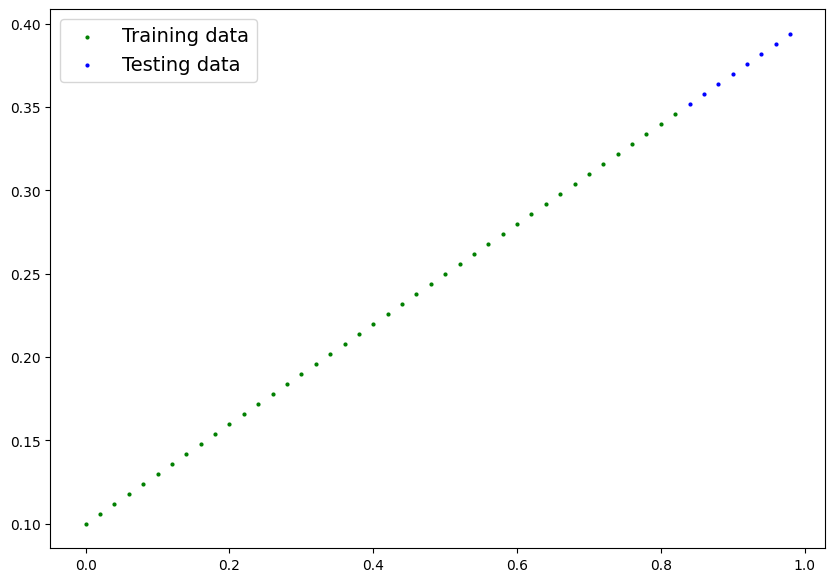

In [75]:
#plot data

plot_predictions(x_train, y_train, x_test, y_test)

In [86]:
## Building Linear model in 6.2
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [87]:
next(model_1.parameters()).device

device(type='cpu')

In [88]:
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

### Training

For training we need:

Loss function
Optimizer
Training loop
Testing loop

In [89]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [90]:

torch.manual_seed(42)
epochs=250
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  # forward
  y_pred=model_1(x_train)
  #calculate loss
  loss=loss_fn(y_pred, y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  # backward
  loss.backward()
  # optimizer
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(x_test)
    test_loss=loss_fn(test_pred, y_test)
  if epoch%10==0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')



Epoch: 0 | Loss: 0.9204686880111694 | Test loss: 1.1390068531036377
Epoch: 10 | Loss: 0.8036587238311768 | Test loss: 1.0016968250274658
Epoch: 20 | Loss: 0.6868487000465393 | Test loss: 0.8643867373466492
Epoch: 30 | Loss: 0.5700386762619019 | Test loss: 0.727076530456543
Epoch: 40 | Loss: 0.4532286822795868 | Test loss: 0.5897664427757263
Epoch: 50 | Loss: 0.33641868829727173 | Test loss: 0.4524562954902649
Epoch: 60 | Loss: 0.2196086347103119 | Test loss: 0.31514614820480347
Epoch: 70 | Loss: 0.10279855132102966 | Test loss: 0.17783604562282562
Epoch: 80 | Loss: 0.03096523880958557 | Test loss: 0.07876329123973846
Epoch: 90 | Loss: 0.02435152605175972 | Test loss: 0.054569799453020096
Epoch: 100 | Loss: 0.020583314821124077 | Test loss: 0.04470919072628021
Epoch: 110 | Loss: 0.016853895038366318 | Test loss: 0.036849115043878555
Epoch: 120 | Loss: 0.01312889251857996 | Test loss: 0.02832217887043953
Epoch: 130 | Loss: 0.009398609399795532 | Test loss: 0.019795242697000504
Epoch: 140

In [91]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3085]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1019], device='cuda:0'))])

In [95]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(x_test)




In [99]:
y_preds

tensor([[0.3610],
        [0.3672],
        [0.3734],
        [0.3795],
        [0.3857],
        [0.3919],
        [0.3981],
        [0.4042]], device='cuda:0')

In [26]:
import matplotlib.pyplot as plt
import torch
from torch import nn

# Define LinearRegressionModelV2 (copied for self-containment)
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor):
    return self.linear_layer(x)

def plot_predictions(train_data=None,
                     train_labels=None,
                     test_data=None,
                     test_labels=None,
                     predictions=None):

    plt.figure(figsize=(10, 7))

    # Plot training data in green
    if train_data is not None and train_labels is not None:
        plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

    # Plot test data in blue
    if test_data is not None and test_labels is not None:
        plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

    # Plot predictions if they exist
    if predictions is not None:
        # Ensure test_data is available for predictions to be plotted against
        if test_data is not None:
            plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        else:
            print("Warning: Predictions provided without test_data. Plotting against index.")
            plt.scatter(range(len(predictions)), predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

# Ensure device is defined
device ='cuda' if torch.cuda.is_available() else 'cpu'

# Re-instantiate model_1 and move to device using the LinearRegressionModelV2 class
torch.manual_seed(42)
model_1 = LinearRegressionModelV2().to(device)

# Move x_test to device for predictions
x_test_device = x_test.to(device)

# Generate predictions for the current x_test
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(x_test_device)

# Plotting call, moving data back to CPU for matplotlib
plot_predictions(train_data=x_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=x_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

NameError: name 'y_preds' is not defined

### Save and load


In [104]:
from pathlib import Path
MODEL_PATH=Path('models')
# Create model directory
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME='01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save model state dic
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)



Saving model to models/01_pytorch_workflow_model_1.pth


In [105]:
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [27]:
from torch import nn

# Define LinearRegressionModelV2 (copied from Pll1xtyqk_tF to make this cell self-contained)
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor):
    return self.linear_layer(x)

loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1=loaded_model_1.to(device)
loaded_model_1.eval()


with torch.inference_mode():
  loaded_model_preds=loaded_model_1(x_test)
loaded_model_preds.device
y_preds==loaded_model_preds

NameError: name 'LinearRegressionModelV2' is not defined

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [4]:
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
weight=0.3
bias=0.9
start=0
end=1
step=0.02
X=torch.arange(start, end, step)
y=weight*X+bias
X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.9000, 0.9060, 0.9120, 0.9180, 0.9240, 0.9300, 0.9360, 0.9420, 0.9480,
         0.9540]))

In [32]:
train_split=int(len(X)*0.8)
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [33]:
import matplotlib.pyplot as plt
import torch
from torch import nn

# Define LinearRegressionModelV2 (copied for self-containment)
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor):
    return self.linear_layer(x)

# The plot_predictions function is already defined in cell Ls_Szq4buXgt and also in chEB2gtns67o.
# Re-defining it here for self-containment for this specific error fix.
def plot_predictions(train_data=None,
                     train_labels=None,
                     test_data=None,
                     test_labels=None,
                     predictions=None):

    plt.figure(figsize=(10, 7))

    # Plot training data in green
    if train_data is not None and train_labels is not None:
        plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

    # Plot test data in blue
    if test_data is not None and test_labels is not None:
        plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

    # Plot predictions if they exist
    if predictions is not None:
        # Ensure test_data is available for predictions to be plotted against
        if test_data is not None:
            plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        else:
            print("Warning: Predictions provided without test_data. Plotting against index.")
            plt.scatter(range(len(predictions)), predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

# Ensure device is defined
device ='cuda' if torch.cuda.is_available() else 'cpu'

# Re-instantiate model_1 and move to device using the LinearRegressionModelV2 class
torch.manual_seed(42)
model_1 = LinearRegressionModelV2().to(device)

# Move x_test to device for predictions
x_test_device = x_test.to(device)

# Generate predictions for the current x_test
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(x_test_device)

# Plotting call, moving data back to CPU for matplotlib
plot_predictions(train_data=x_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=x_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

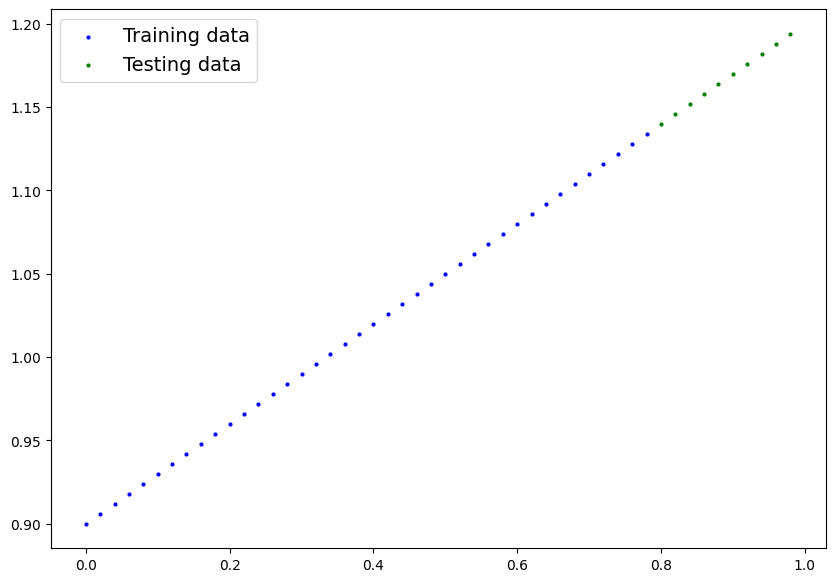

In [34]:
plot_predictions(X_train, y_train, X_test, y_test)

In [57]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor):
      return self.linear_layer(x)

torch.manual_seed(42)
model_1_1=LinearRegressionModelV1().to(device) # Moved model to device
model_1_1, model_1_1.state_dict()

(LinearRegressionModelV1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

In [58]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1_1.parameters(), lr=0.01)


In [60]:
torch.manual_seed(42)
epochs=300
# Ensure X_train, y_train, X_test, y_test have the correct shape (batch_size, 1)
X_train = X_train.unsqueeze(dim=1).to(device)
y_train = y_train.unsqueeze(dim=1).to(device)
X_test = X_test.unsqueeze(dim=1).to(device)
y_test = y_test.unsqueeze(dim=1).to(device)
for epoch in range(epochs):
  model_1_1.train()
  # forward
  y_pred=model_1_1(X_train)
  #calculate loss
  loss=loss_fn(y_pred, y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  # backward
  loss.backward()
  # optimizer
  optimizer.step()


  model_1_1.eval()
  with torch.inference_mode():
    test_pred=model_1_1(X_test)
    test_loss=loss_fn(test_pred, y_test)
  if epoch%20==0:
      print(f'Epoch: {epoch} | Loss:{loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss:0.12616769969463348 | Test Loss: 0.3342254161834717
Epoch: 20 | Loss:0.08189656585454941 | Test Loss: 0.21857480704784393
Epoch: 40 | Loss:0.07218801230192184 | Test Loss: 0.17499032616615295
Epoch: 60 | Loss:0.06520798057317734 | Test Loss: 0.15295074880123138
Epoch: 80 | Loss:0.05831371620297432 | Test Loss: 0.1357191950082779
Epoch: 100 | Loss:0.051440197974443436 | Test Loss: 0.11986131966114044
Epoch: 120 | Loss:0.04457508772611618 | Test Loss: 0.10331656038761139
Epoch: 140 | Loss:0.037709739059209824 | Test Loss: 0.08745870739221573
Epoch: 160 | Loss:0.03083622455596924 | Test Loss: 0.07160084694623947
Epoch: 180 | Loss:0.0239678006619215 | Test Loss: 0.055056121200323105
Epoch: 200 | Loss:0.01710296794772148 | Test Loss: 0.039198245853185654
Epoch: 220 | Loss:0.010232262313365936 | Test Loss: 0.023340368643403053
Epoch: 240 | Loss:0.003360512899234891 | Test Loss: 0.006795644760131836
Epoch: 260 | Loss:0.007012799382209778 | Test Loss: 0.003249275730922818
Epoch

In [61]:
model_1_1.eval()
with torch.inference_mode():
  y_pred=model_1_1(X_test)


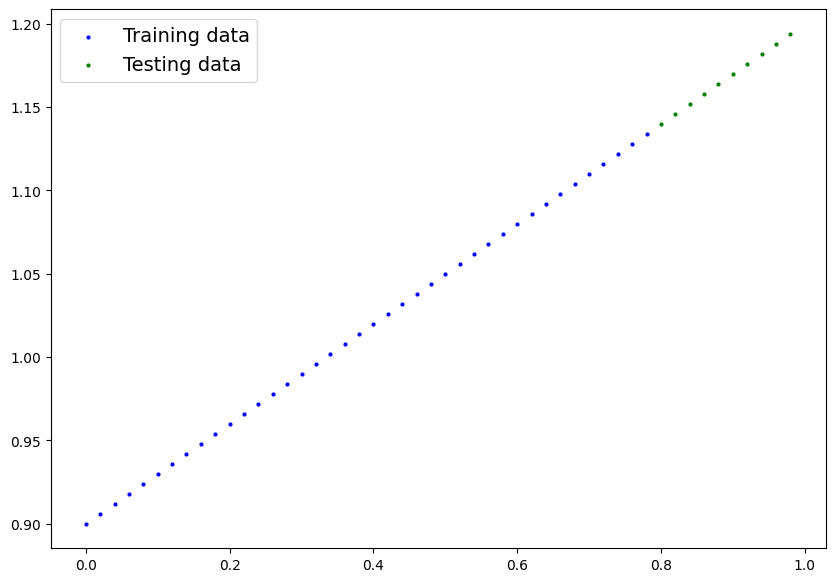

In [67]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

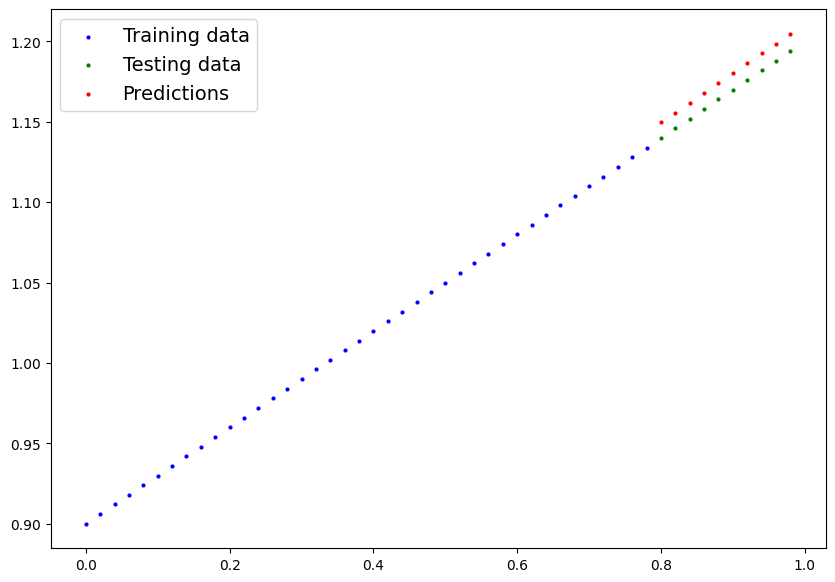

In [65]:
plot_predictions(predictions=y_pred.cpu())

In [68]:
from pathlib import Path
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME='01_pytorch_workflow_model_1_1.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_1_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model_1_1.pth


In [70]:
loaded_model_1_1=LinearRegressionModelV1()
loaded_model_1_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print('Loaded model: ' ,loaded_model_1_1)
print(f'Device of loaded model: {next(loaded_model_1_1.parameters()).device}')


Loaded model:  LinearRegressionModelV1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Device of loaded model: cpu


In [77]:
# Evaluate loaded model
loaded_model_1_1.eval()
loaded_moedl_1_1=loaded_model_1_1.to(device)
with torch.inference_mode():
    loaded_model_1_1_preds = loaded_model_1_1(X_test)
y_pred == loaded_model_1_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')